In [194]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('C:/Users/Aditya Sharma/Desktop/daily-total-female-births-CA.csv', header=0)

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
dataframe['date'].dtype

dtype('O')

### Loading data with parse_dates

In [5]:
df2 = pd.read_csv('C:/Users/Aditya Sharma/Desktop/daily-total-female-births-CA.csv', header=0, parse_dates=[0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2['date'].dtype

dtype('<M8[ns]')

### Loading data as series

In [8]:
series = pd.read_csv('C:/Users/Aditya Sharma/Desktop/daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

## Exploring Time Series Data

### Size

In [10]:
series.shape

(365,)

In [11]:
df2.shape

(365, 2)

## Querying by time

In [12]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [13]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


In [14]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Time Series - Data Visualization

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
Dataviz_df = df2.copy()

In [18]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


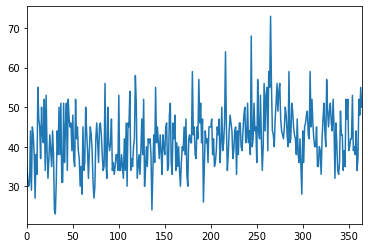

In [19]:
Dataviz_df['births'].plot()

In [20]:
Dataviz_df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [21]:
Dataviz_df.index = Dataviz_df['date']

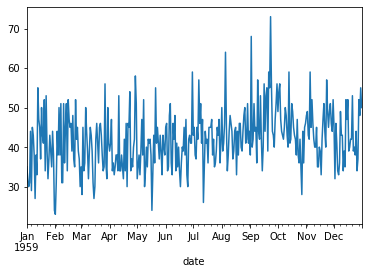

In [22]:
Dataviz_df['births'].plot()

## Zooming in

In [24]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date']> '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [25]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


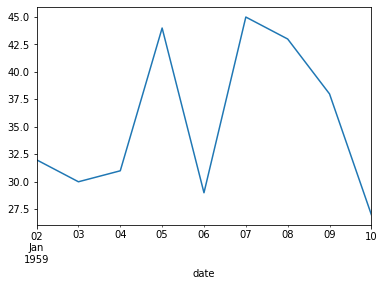

In [26]:
Dataviz_df2['births'].plot()

## Trendline

In [27]:
import seaborn as sns

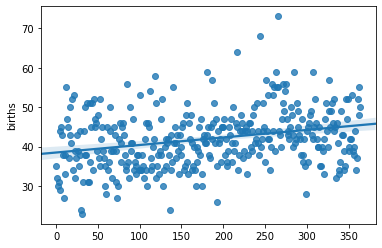

In [28]:
sns.regplot(x=df2.index.values, y=df2['births']) #for scatterplot you neeed numeric data and not date type

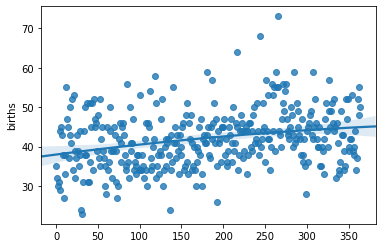

In [29]:
sns.regplot(x= df2.index.values, y=df2['births'], order=2) # quadratic trend line

In [30]:
niles_df = pd.read_csv('C:/Users/Aditya Sharma/Desktop/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [31]:
niles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


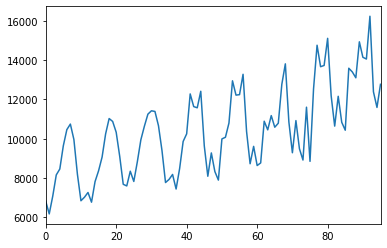

In [32]:
niles_df['MilesMM'].plot()

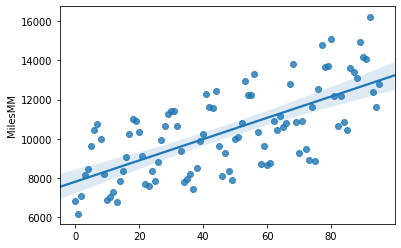

In [33]:
sns.regplot(x=niles_df.index.values, y=niles_df['MilesMM'])

## Removing Seasonality

In [34]:
niles_df['year'] = niles_df['Month'].dt.year

In [35]:
niles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [36]:
niles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

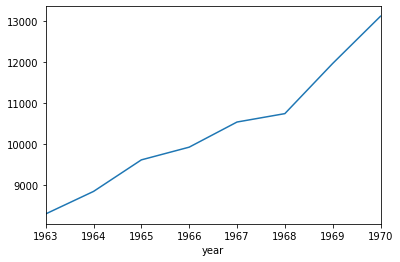

In [37]:
niles_df.groupby('year')['MilesMM'].mean().plot()

## Creating Lag plots

In [38]:
niles_df['lag1'] = niles_df['MilesMM'].shift(1)

In [39]:
niles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


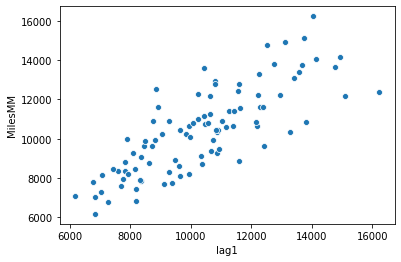

In [40]:
sns.scatterplot(x=niles_df['lag1'], y=niles_df['MilesMM'])

In [41]:
from pandas.plotting import lag_plot

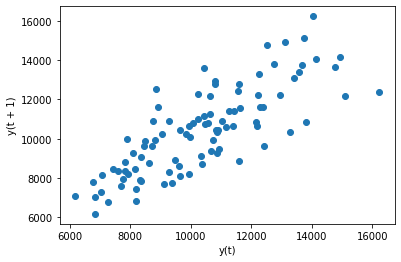

In [42]:
lag_plot(niles_df['MilesMM']) # directly plot at lag1=> no shifting needed

## Autocorrelation Plots

In [43]:
from pandas.plotting import autocorrelation_plot

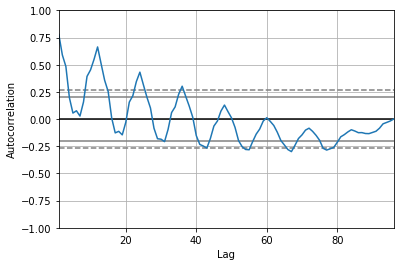

In [66]:
autocorrelation_plot(niles_df['MilesMM'])

# Downsampling and Upsampling

In [72]:
miles_df = pd.read_csv('C:/Users/Aditya Sharma/Desktop/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [73]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


## Downsampling

In [75]:
quarterly_miles_df=miles_df.resample('Q', on='Month').mean() #new frequency = 'Q'uarterly

In [77]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [80]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum() #new frequency = 'A'nnualy

In [82]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


In [83]:
## Upsampling

In [85]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean() #new frequency = 'D'aily

In [93]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [94]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear') #fitting linear line in between

In [95]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


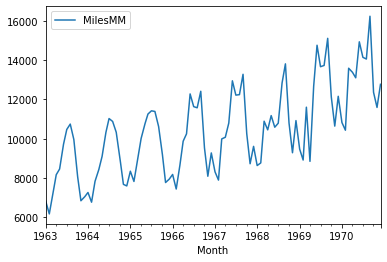

In [96]:
interpolated_miles_df.plot()

In [97]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

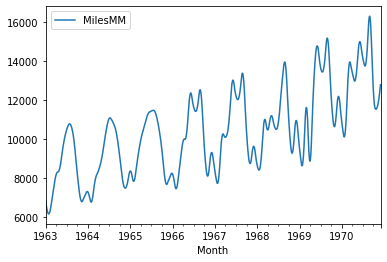

In [98]:
poly_interpolated_miles_df.plot()

# Feature Engineering
Date time features 

Window features

Exapnding features

## Date time features

In [45]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [46]:
features=df2.copy()

In [47]:
features['year'] = df2['date'].dt.year

In [48]:
features['month'] = df2['date'].dt.month

In [49]:
features['day'] = df2['date'].dt.day

In [50]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [51]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


## Lag Features

To create lag1 feature

In [53]:
features['lag1'] = df2['births'].shift(1)

In [54]:
features['lag2'] =df2['births'].shift(365)

In [55]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [56]:
features.tail()

,date,births,year,month,day,lag1,lag2
360,1959-12-27,37,1959,12,27,34.0,NaN
361,1959-12-28,52,1959,12,28,37.0,NaN
362,1959-12-29,48,1959,12,29,52.0,NaN
363,1959-12-30,55,1959,12,30,48.0,NaN
364,1959-12-31,50,1959,12,31,55.0,NaN


## Window features

In [58]:
features['Roll_mean'] = df2['births'].rolling(window=2).mean() #window means number of periods

In [59]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [61]:
features['Roll_max'] = df2['births'].rolling(window=3).max()

In [63]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


## Expanding features

In [64]:
features['Expand_max'] =df2['births'].expanding().max() #dont give a window size,  where we need all the data

In [65]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


# Decomposing Time Series

## Addictive model
y(t) = Level + Trend + Noise

## Multiplicative model
y(t) = Level*Trend*Noise

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [104]:
miles_decomp_df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [105]:
miles_decomp_df.index = miles_decomp_df['Month']

In [106]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model ='additive')

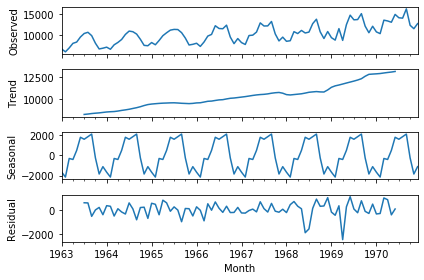

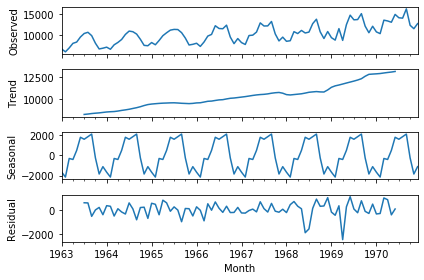

In [107]:
result.plot()

In [110]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

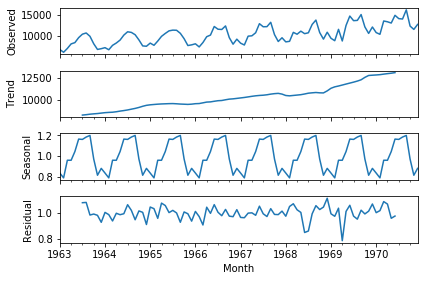

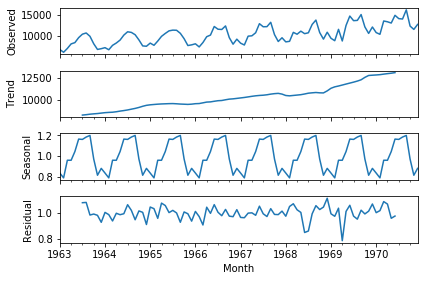

In [111]:
result2.plot()

## Differencing

In [113]:
miles_df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [114]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [116]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [117]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1) #lag1, removing trend

In [119]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


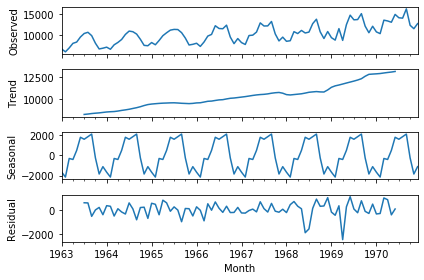

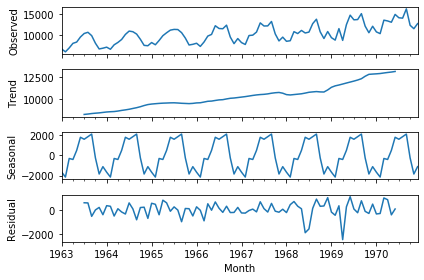

In [122]:
miles_df.index = miles_df['Month']
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

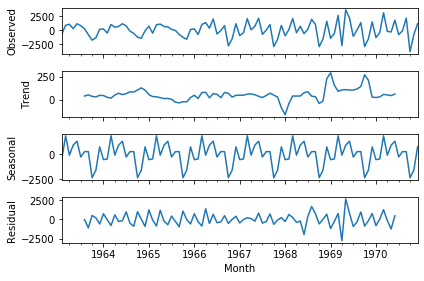

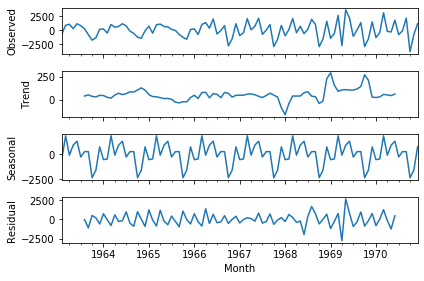

In [124]:
miles_df.index = miles_df['Month']
result_b = seasonal_decompose(miles_df.iloc[1:, 3], model='additive') #since first value is nan
result_b.plot()

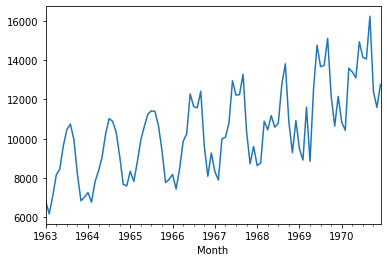

In [126]:
miles_df['MilesMM'].plot()

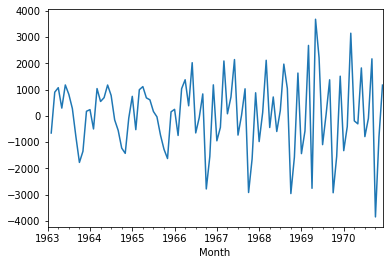

In [127]:
miles_df['MilesMM_diff_1'].plot()

In [128]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12) #removing seasonality

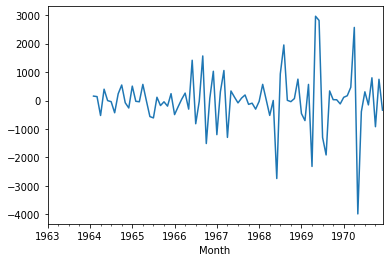

In [129]:
miles_df['MilesMM_diff_12'].plot()

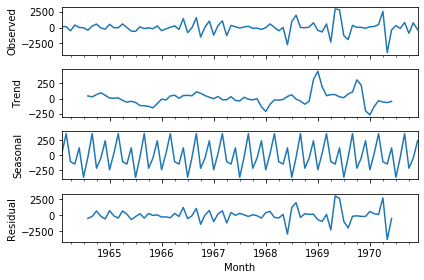

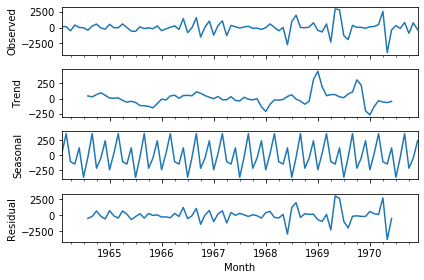

In [131]:
result_b = seasonal_decompose(miles_df.iloc[13:, 4], model='additive')
result_b.plot()

In [145]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


# Train-Test-Split

In [133]:
temp_df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [134]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [136]:
temp_df.shape

(3650, 2)

In [137]:
temp_df.shape[0]

3650

In [138]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [140]:
train = temp_df[0:train_size]

In [142]:
test=temp_df[train_size:]

In [143]:
train.shape

(2920, 2)

In [144]:
test.shape

(730, 2)

## Persistence Model

In [149]:
df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [150]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [156]:
df['t'] = df['Temp'].shift(1) #because we want to forecast

In [157]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [158]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [159]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [160]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

### walk-forward validation

In [161]:
predictions = test_X.copy()

In [163]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [164]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [167]:
from matplotlib import pyplot

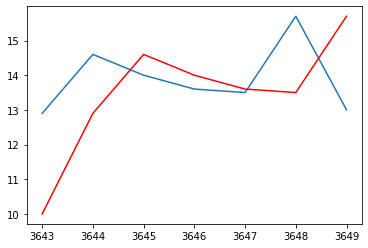

In [169]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

## Autoregression Model

In [171]:
df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [174]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [175]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [176]:
from statsmodels.tsa.ar_model import AR

In [178]:
model = AR(train)
model_fit = model.fit()

### No. of lag Variables

In [181]:
model_fit.k_ar

29

### Coef of lag variables

In [183]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [184]:
predictions = model_fit.predict(start=len(train), end =len(train)+len(test)-1)

In [185]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [186]:
predictions.iloc[0]

11.871274847727832

In [189]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

1.501525231006988

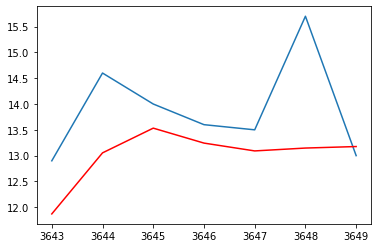

In [190]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

## Walk Forward

In [191]:
df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [192]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [195]:
data =train
predict =[]
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)


11.871274847727832
13.660699943835198
14.353164144090158
13.43012079162701
13.374756477185123
13.47911129942051
14.767773018439883


In [196]:
predict

[11.871274847727832,
 13.660699943835198,
 14.353164144090158,
 13.43012079162701,
 13.374756477185123,
 13.47911129942051,
 14.767773018439883]

In [199]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.452456842518536

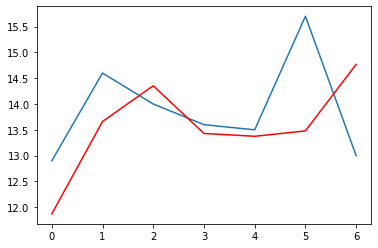

In [200]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

## Moving Average Model

In [202]:
df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [203]:
df['t'] =df['Temp'].shift(1)

In [204]:
df['Resid'] = df['Temp']-df['t']

In [205]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [209]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [211]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [213]:
from statsmodels.tsa.ar_model import AR

In [214]:
model=AR(train)
model_fit = model.fit()

In [215]:
model_fit.k_ar

29

In [216]:
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [218]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [219]:
predictions= df.t[df.shape[0]-7:] + pred_resid

In [220]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

2.049398556648206

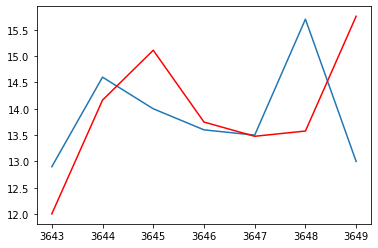

In [221]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')